In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# dados originais
data = pd.read_csv('players_stats_new.csv')
data

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Birth_Place,Birthdate,Collage,Experience,Pos,Team,Age,Height,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,us,7-Oct-86,University of Connecticut,5,PG,PHO,29,185.0,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,us,14-Jan-85,University of Oregon,6,PG,CHI,30,180.0,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,us,16-Sep-95,University of Arizona,R,PF,ORL,20,202.5,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,us,19-Feb-91,Michigan State University,R,PF,ATL,24,205.0,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,do,3-Jun-86,University of Florida,7,C,ATL,29,205.0,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,...,us,4-Jan-85,NaN,10,C,CHA,30,205.0,130.05,30.945866
6,Alan Anderson,74,1744,545,195,440,44.3,73,210,34.8,...,us,16-Oct-82,Michigan State University,5,SG,NJN,33,195.0,99.00,26.035503
7,Alec Burks,27,899,374,121,300,40.3,26,68,38.2,...,us,20-Jul-91,University of Colorado,3,SG,UTA,24,195.0,96.30,25.325444
8,Alex Kirk,5,14,4,1,4,25.0,0,0,0.0,...,us,14-Nov-91,University of New Mexico,R,C,CLE,24,210.0,110.25,25.000000
9,Alex Len,69,1518,432,179,353,50.7,1,3,33.3,...,ua,16-Jun-93,University of Maryland,1,C,PHO,22,212.5,117.00,25.910035


In [3]:
# um pouco mais de informações sobre os dados
data.describe()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,53.757180,1234.989556,511.950392,191.584856,425.780679,43.175457,41.083551,116.532637,25.778329,87.697128,...,24.804178,69.404700,103.420366,577.130548,1.490914,0.628381,27.467363,197.734987,99.816580,25.440336
std,23.707114,810.548586,426.225256,157.269194,336.623905,9.214672,49.217046,129.320185,15.497883,92.391876,...,32.670588,56.998215,64.674645,467.205123,0.824384,0.371926,4.179025,8.692892,12.402264,1.730134
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523
25%,36.000000,507.000000,155.500000,61.000000,148.000000,39.900000,1.000000,6.000000,16.300000,20.500000,...,5.000000,24.000000,52.000000,175.500000,0.920000,0.390000,24.000000,191.250000,90.000000,24.273035
50%,62.000000,1233.000000,432.000000,160.000000,361.000000,43.300000,19.000000,60.000000,31.400000,58.000000,...,14.000000,59.000000,106.000000,506.000000,1.440000,0.540000,27.000000,200.000000,99.000000,25.411765
75%,74.000000,1910.500000,779.000000,292.500000,652.500000,47.650000,67.500000,192.000000,36.400000,130.000000,...,30.000000,100.500000,148.000000,839.500000,1.960000,0.820000,30.000000,205.000000,108.675000,26.530612
max,82.000000,2981.000000,2217.000000,659.000000,1470.000000,85.700000,286.000000,646.000000,66.700000,715.000000,...,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141


In [4]:
# coeficiente de relação (quanto mais próximo de 1.0 ou -1.0, melhor atributo)
data.corr()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.868801,0.715884,0.727393,0.732333,0.390008,0.492188,0.511725,0.206241,0.564018,...,0.444156,0.698051,0.855979,0.746531,0.180447,0.003800,0.124174,0.025651,0.040425,0.046466
MIN,0.868801,1.000000,0.917161,0.920816,0.925566,0.321441,0.608622,0.624080,0.281137,0.772047,...,0.499550,0.862274,0.866298,0.922264,0.202546,-0.056566,0.072414,-0.021220,0.000758,0.030585
PTS,0.715884,0.917161,1.000000,0.989577,0.988967,0.289329,0.630076,0.637590,0.302480,0.908683,...,0.446003,0.875246,0.740206,0.942713,0.160444,-0.106106,0.054055,-0.040485,0.005257,0.059068
FGM,0.727393,0.920816,0.989577,1.000000,0.987260,0.326304,0.558118,0.565509,0.262973,0.863444,...,0.491525,0.862230,0.764479,0.953247,0.140756,-0.116575,0.053422,0.006137,0.054984,0.088174
FGA,0.732333,0.925566,0.988967,0.987260,1.000000,0.249937,0.632655,0.650849,0.316259,0.864300,...,0.410698,0.876600,0.747587,0.919441,0.188956,-0.104780,0.056191,-0.066415,-0.018828,0.048493
FG%,0.390008,0.321441,0.289329,0.326304,0.249937,1.000000,-0.031659,-0.059201,-0.079547,0.240740,...,0.425336,0.247373,0.397976,0.396972,-0.111132,-0.076306,0.060379,0.338898,0.365319,0.220869
3PM,0.492188,0.608622,0.630076,0.558118,0.632655,-0.031659,1.000000,0.988107,0.556547,0.473934,...,-0.067063,0.519542,0.388288,0.464736,0.291440,0.054438,0.100790,-0.324519,-0.323237,-0.163054
3PA,0.511725,0.624080,0.637590,0.565509,0.650849,-0.059201,0.988107,1.000000,0.552525,0.489771,...,-0.075948,0.545271,0.405077,0.464624,0.310491,0.059449,0.087843,-0.349649,-0.348008,-0.175425
3P%,0.206241,0.281137,0.302480,0.262973,0.316259,-0.079547,0.556547,0.552525,1.000000,0.203675,...,-0.216722,0.222589,0.088544,0.167020,0.359099,0.099977,0.026425,-0.371982,-0.443734,-0.321837
FTM,0.564018,0.772047,0.908683,0.863444,0.864300,0.240740,0.473934,0.489771,0.203675,1.000000,...,0.419897,0.825583,0.605315,0.856162,0.105729,-0.121623,0.013805,-0.034787,0.009253,0.059175


In [6]:
# Campos relavantes para o treinamento
cols = ['FGA']
# Campo para predição
cols_target = ['FGM']

regression = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(
    data[cols], data[cols_target], test_size=0.2, random_state=4)

In [7]:
x_train_age = x_train['FGA']
x_train_age

63      207
289     919
303     247
60      829
134     217
12      357
137     778
377     506
263     928
130      63
166     201
249     242
328     269
337     106
89        7
327     174
45      543
223       1
319      12
129     746
211     596
93      313
33      496
170      33
154     378
312     701
88      416
232      22
336     470
372     415
       ... 
49      452
136     535
30      327
381     753
194     427
56      743
201     145
149     725
21      361
183      11
0       137
52       69
126     557
294     151
44      137
164    1470
379     402
313      12
311     558
94        6
109     700
359     134
252    1415
58      396
306     600
87      339
360       3
197     354
174     192
122     928
Name: FGA, Length: 306, dtype: int64

In [8]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

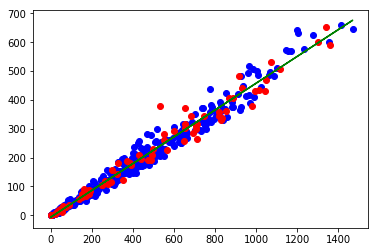

In [9]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)

plt.scatter(x_train['FGA'], y_train, color='blue')
plt.scatter(x_test['FGA'], y_test, color='red')
plt.plot(x_train['FGA'], model.predict(x_train), color='green')
plt.show()

In [10]:
x_train

,FGA
63,207
289,919
303,247
60,829
134,217
12,357
137,778
377,506
263,928
130,63


In [10]:
x_test

,age,sex,bmi,children,region
726,41,1,28.405,1,2
260,58,0,25.200,0,0
902,26,1,27.265,3,3
566,38,0,40.565,1,2
776,40,1,32.300,2,2
270,18,1,29.370,1,1
13,56,0,39.820,0,1
280,40,0,28.120,1,3
885,32,1,28.930,1,1
854,49,0,23.845,3,3


In [11]:
y_train

,charges
127,9634.538000
578,9724.530000
385,1261.859000
1203,9964.060000
413,5080.096000
431,4906.409650
707,10264.442100
427,7323.734819
574,13224.057050
435,13919.822900


In [12]:
y_test

,charges
726,6664.68595
260,11837.16000
902,4661.28635
566,6373.55735
776,6986.69700
270,1719.43630
13,11090.71780
280,22331.56680
885,19719.69470
854,24106.91255


In [11]:
# Executa Treinamento com 80% dos dados disponíveis
regression.fit(x_train, y_train)

# Faz previsão dos 20% dos dados que não entraram no treinamento
output = regression.predict(x_test)
output


array([[405.68218522],
       [ 72.80750642],
       [ 12.91791986],
       [297.04526076],
       [ 63.98655956],
       [257.58313008],
       [146.62490381],
       [132.69709298],
       [  7.81105589],
       [  5.48975408],
       [ -5.18823422],
       [223.69212373],
       [616.4563891 ],
       [ 82.09271364],
       [ 80.2356722 ],
       [165.19531825],
       [ 33.8096361 ],
       [479.49958262],
       [ 10.13235769],
       [456.28656457],
       [316.07993556],
       [ 57.48691451],
       [296.5810004 ],
       [511.99780788],
       [249.22644358],
       [425.64538075],
       [294.2596986 ],
       [596.95745394],
       [248.76218322],
       [449.32265915],
       [272.43946163],
       [324.90088242],
       [ 72.80750642],
       [478.10680153],
       [ 15.23922166],
       [129.44727046],
       [ 70.48620462],
       [192.12241919],
       [175.40904619],
       [219.97804084],
       [ 69.09342353],
       [297.04526076],
       [ -4.72397386],
       [109

In [12]:
# Verifica a qualidade da previsão
score = r2_score(y_test, output)
score

0.9695164460253392

In [13]:
# Usa o treinamento para fazer uma previsão de um dado novo
df_new_attempted_info = pd.DataFrame(
    [(201)], columns=['FGA'])

output2 = regression.predict(df_new_attempted_info)
output2

array([[87.19957761]])